In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
#pd.set_option('display.max_rows', 200)
#pd.set_option("display.max_columns", 999)

import os
from multiprocessing import Pool
import psutil

import tensorflow as tf
print(tf.__version__)
print(tf.test.is_built_with_cuda())

2023-04-05 16:43:38.866415: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-05 16:43:39.091028: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.10.0
True


In [2]:
def read_training_files(FileName):
    print("Training file: " + FileName + "\n")
    return pd.read_csv(FileName, header=0, skipinitialspace=True, nrows=100000)

In [3]:
def read_testing_files(FileName):
    print("Testing file: " + FileName + "\n")
    return pd.read_csv(FileName, header=0, skipinitialspace=True, skiprows=range(1,100000), nrows=50000)

In [4]:
Masses = [500, 600, 700, 800, 900, 1000]
Files = ["tree_ML_MCRun2_" + str(Mass) + "GeV.csv" for Mass in Masses]

In [5]:
FileSize = 0
for File in Files:
    FileSize += os.path.getsize(File)
    
Mem0 = psutil.virtual_memory().available

TrainingDF = None
TestingDF = None
with Pool(processes=6) as pool:
    TrainingDF = pd.concat(pool.map(read_training_files, Files))
    TestingDF = pd.concat(pool.map(read_testing_files, Files))

Mem1 = psutil.virtual_memory().available
print("Total file size: " + str(FileSize/(1024**3)) + "GB")
print("Memory used: " + str((Mem0 - Mem1)/(1024**3)) + "GB")

Training file: tree_ML_MCRun2_500GeV.csv
Training file: tree_ML_MCRun2_600GeV.csv
Training file: tree_ML_MCRun2_800GeV.csv

Training file: tree_ML_MCRun2_1000GeV.csv
Training file: tree_ML_MCRun2_700GeV.csv


Training file: tree_ML_MCRun2_900GeV.csv



Testing file: tree_ML_MCRun2_500GeV.csv
Testing file: tree_ML_MCRun2_800GeV.csv
Testing file: tree_ML_MCRun2_700GeV.csv
Testing file: tree_ML_MCRun2_900GeV.csv
Testing file: tree_ML_MCRun2_1000GeV.csv
Testing file: tree_ML_MCRun2_600GeV.csv






Total file size: 0.14248074032366276GB
Memory used: 0.09020233154296875GB


In [6]:
TrainingDF

,M4,R1,R2,R3,Truth,Mass
0,1.615654,0.596896,0.527062,0.299362,2,500
1,2.238177,0.702622,0.460715,0.456434,2,500
2,1.484222,0.685523,0.526373,0.391565,2,500
3,2.021423,0.657197,0.486695,0.410394,2,500
4,1.884465,0.650958,0.516887,0.294112,2,500
...,...,...,...,...,...,...
99995,1.883865,0.534234,0.460678,0.422482,0,1000
99996,3.038430,0.600369,0.408263,0.343466,2,1000
99997,2.490334,0.684008,0.436359,0.414619,2,1000
99998,2.262540,0.516382,0.450869,0.436098,2,1000


In [7]:
TrainingDF.dtypes

M4       float64
R1       float64
R2       float64
R3       float64
Truth      int64
Mass       int64
dtype: object

(array([100000.,      0., 100000.,      0., 100000.,      0., 100000.,
             0., 100000., 100000.]),
 array([ 500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,  900.,
         950., 1000.]),
 <BarContainer object of 10 artists>)

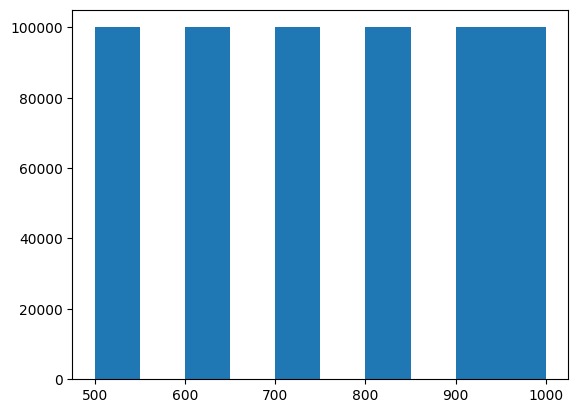

In [8]:
plt.hist(TrainingDF["Mass"])

(array([50000.,     0., 50000.,     0., 50000.,     0., 50000.,     0.,
        50000., 50000.]),
 array([ 500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,  900.,
         950., 1000.]),
 <BarContainer object of 10 artists>)

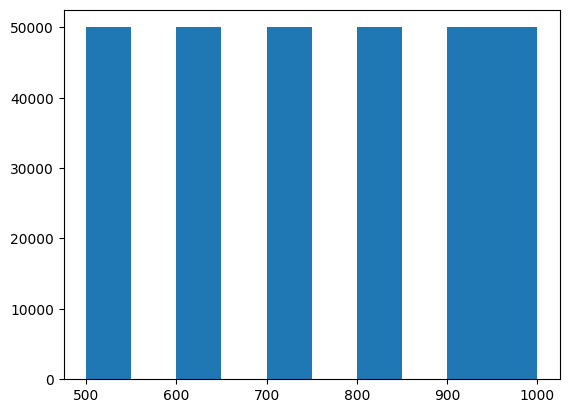

In [9]:
plt.hist(TestingDF["Mass"])

In [10]:
TrainingInputs = TrainingDF[['M4', 'R1', 'R2', 'R3']].to_numpy()
TrainingTruth = TrainingDF["Truth"].to_numpy()

TestingInputs = TestingDF[['M4', 'R1', 'R2', 'R3']].to_numpy()

In [11]:
print(TrainingInputs.shape)
print(TrainingTruth.shape)
print(TestingInputs.shape)

(600000, 4)
(600000,)
(300000, 4)


In [12]:
def model_DNN_lite():
    Model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')],
        name = "ModelDNNLite"
    )
    Model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
    return Model

In [13]:
def model_DNN():
    Model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')],
        name = "ModelDNN"
    )
    Model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
    return Model

In [14]:
Model = model_DNN_lite()
#Model = model_DNN()

2023-04-05 16:43:42.881550: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-05 16:43:43.637405: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6647 MB memory:  -> device: 0, name: Tesla P100-PCIE-12GB, pci bus id: 0000:65:00.0, compute capability: 6.0


In [15]:
Model.fit(TrainingInputs, TrainingTruth, batch_size = 1024,
          epochs = 20, validation_split = 0.2)

Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 0.8218 - accuracy: 0.5850 - val_loss: 1.2707 - val_accuracy: 0.4000
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.7320 - accuracy: 0.6293 - val_loss: 1.2891 - val_accuracy: 0.4077
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6957 - accuracy: 0.6453 - val_loss: 1.2518 - val_accuracy: 0.4201
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6829 - accuracy: 0.6519 - val_loss: 1.3226 - val_accuracy: 0.4289
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6783 - accuracy: 0.6536 - val_loss: 1.3674 - val_accuracy: 0.4281
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6760 - accuracy: 0.6536 - val_loss: 1.3684 - val_accuracy: 0.4291
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6734 - accuracy: 0.6535 - val_loss: 1.3916 - val_accuracy: 0.4313
Epoch 

In [16]:
Model.summary()

Model: "ModelDNNLite"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 3)                 27        
                                                                 
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________


In [17]:
TestingOutputs = Model.predict(TestingInputs, batch_size = 1024)

293/293 [==============================] - 0s 1ms/step


In [18]:
TestingOutputs[0]

array([0.05633852, 0.9325886 , 0.01107292], dtype=float32)

In [19]:
TestingPredictions = np.argmax(TestingOutputs, axis = 1)

In [20]:
print(TestingPredictions.shape)
print(TestingPredictions[0])

(300000,)
1


In [21]:
TestingDF["Pred"] = TestingPredictions.tolist()

In [22]:
TestingDF

,M4,R1,R2,R3,Truth,Mass,Pred
0,1.146924,0.753263,0.383014,0.289630,1,500,1
1,1.270563,0.592479,0.457237,0.444398,2,500,2
2,1.475435,0.547174,0.491401,0.419803,2,500,2
3,1.161358,0.610406,0.422835,0.371498,1,500,1
4,1.439718,0.678990,0.456938,0.339597,2,500,1
...,...,...,...,...,...,...,...
49995,2.031144,0.562254,0.534370,0.468888,2,1000,2
49996,1.166589,0.591774,0.576928,0.485911,0,1000,2
49997,2.218874,0.525513,0.446088,0.309142,1,1000,2
49998,2.551666,0.608357,0.405521,0.399058,2,1000,2


In [23]:
AccPred = []
Acc0 = []
Acc1 = []
Acc2 = []
for Mass in Masses:
    TestingDF_temp = TestingDF.loc[TestingDF["Mass"] == Mass]
    TestingDF_pred = TestingDF_temp.loc[TestingDF_temp["Pred"]==TestingDF_temp["Truth"]]
    TestingDF_0 = TestingDF_temp.loc[0==TestingDF_temp["Truth"]]
    TestingDF_1 = TestingDF_temp.loc[1==TestingDF_temp["Truth"]]
    TestingDF_2 = TestingDF_temp.loc[2==TestingDF_temp["Truth"]]

    AccPred.append(float(len(TestingDF_pred.index))/len(TestingDF_temp.index))
    Acc0.append(float(len(TestingDF_0.index))/len(TestingDF_temp.index))
    Acc1.append(float(len(TestingDF_1.index))/len(TestingDF_temp.index))
    Acc2.append(float(len(TestingDF_2.index))/len(TestingDF_temp.index))

In [24]:
print(AccPred, "Average %.2f" % float(sum(AccPred)/len(AccPred)))
print(Acc0, "Average %.2f" % float(sum(Acc0)/len(Acc0)))
print(Acc1, "Average %.2f" % float(sum(Acc1)/len(Acc1)))
print(Acc2, "Average %.2f" % float(sum(Acc2)/len(Acc2)))

[0.5821, 0.70032, 0.73176, 0.69756, 0.56776, 0.4458] Average 0.62
[0.02722, 0.10198, 0.1671, 0.19664, 0.21688, 0.22934] Average 0.16
[0.1966, 0.32604, 0.35396, 0.37766, 0.38838, 0.39698] Average 0.34
[0.77618, 0.57198, 0.47894, 0.4257, 0.39474, 0.37368] Average 0.50


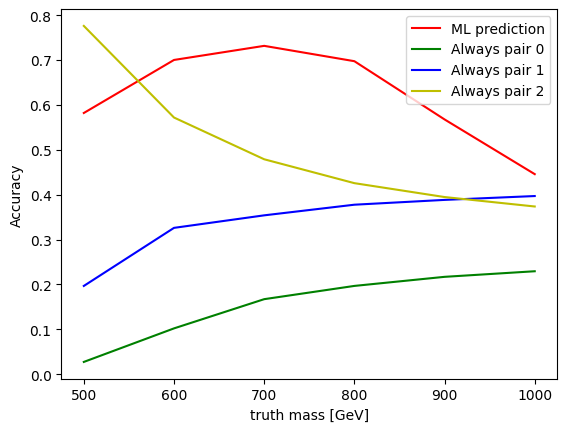

In [25]:
plt.plot(Masses, AccPred, 'r', label = "ML prediction")
plt.plot(Masses, Acc0, 'g', label = "Always pair 0")
plt.plot(Masses, Acc1, 'b', label = "Always pair 1")
plt.plot(Masses, Acc2, 'y', label = "Always pair 2")
plt.legend(loc='upper right')
plt.xlabel("truth mass [GeV]")
plt.ylabel("Accuracy")
plt.savefig("plots/" + Model.name + "_Acc_vs_mass.png")